In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os, sys
import mpl_scatter_density
import mplhep as hep
import matplotlib
import mpl_scatter_density

sys.path.append('../')
from utils import load
import torch

/export/home/phys/sdurgut/anaconda3/envs/deepmet5/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [3]:
epoch = 1

In [10]:
prefix = '/export/home/phys/sdurgut/test_L1DeepMetv2/L1DeepMETv2'
ckpts_1 = f'{prefix}/ckpts_ttbar_batch_32_lr_0.1_wd_0.001_loss_fn_response_tune_500_woembedding_090924'
ckpts_2 = f'{prefix}/ckpts_ttbar_batch_32_lr_0.1_wd_0.001_loss_fn_response_tune_500' 

### Plot straight from the histogram saved in resolutions file

In [22]:
plt.style.use(hep.style.CMS)

model_1 = load(ckpts_1 + '/best.resolutions')
model_2 = load(ckpts_2 + '/best.resolutions')

colors = {
#    'pfMET': 'black',
    'puppiMET': 'red',
#    'deepMETResponse': 'blue',
#    'deepMETResolution': 'green',
    'MET':  'magenta',
}
label_arr = {
    'MET':     'Graph MET' ,
#    'pfMET':    'PF MET',
    'puppiMET': 'PUPPI MET',
#    'deepMETResponse': 'DeepMETResponse',
#    'deepMETResolution': 'DeepMETResolution',
}
resolutions_arr = {
    'MET':      [[],[],[]],
#    'pfMET':    [[],[],[]],
    'puppiMET': [[],[],[]],
#    'deepMETResponse': [[],[],[]],
#    'deepMETResolution': [[],[],[]],
}

In [40]:
def plot_metric(model_data, key, metric_key, figure_number, label_suffix, model_color, xlabel, title, ylim=None):
    plt.figure(figure_number)
    xx = model_data[key][metric_key][1][0:20]
    if key == 'MET' and metric_key == 'R':
        
        yy = model_data[key][metric_key][0] /128 
    else:
        yy = model_data[key][metric_key][0]
    plt.hlines(yy, xx, xx+20, color=model_color, label=f"{label_arr[key]} ({label_suffix})")
    
    if ylim:
        plt.ylim(ylim)
    
    plt.legend(loc='upper left' if figure_number != 3 else 'upper right')
    plt.xlabel(xlabel)
    plt.title(title)


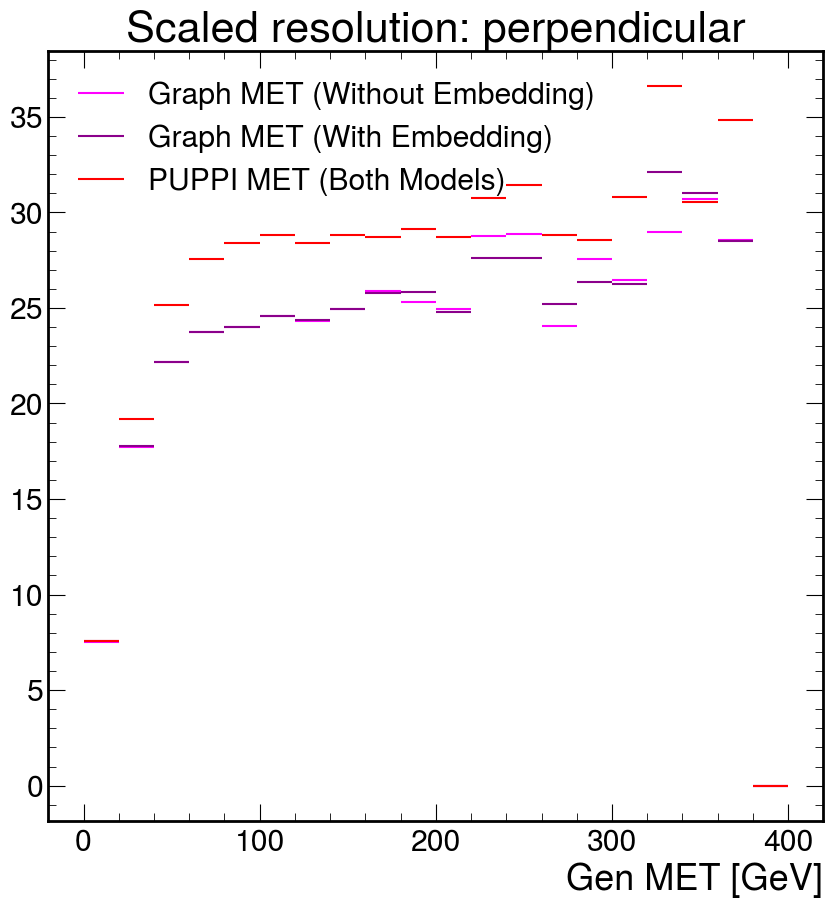

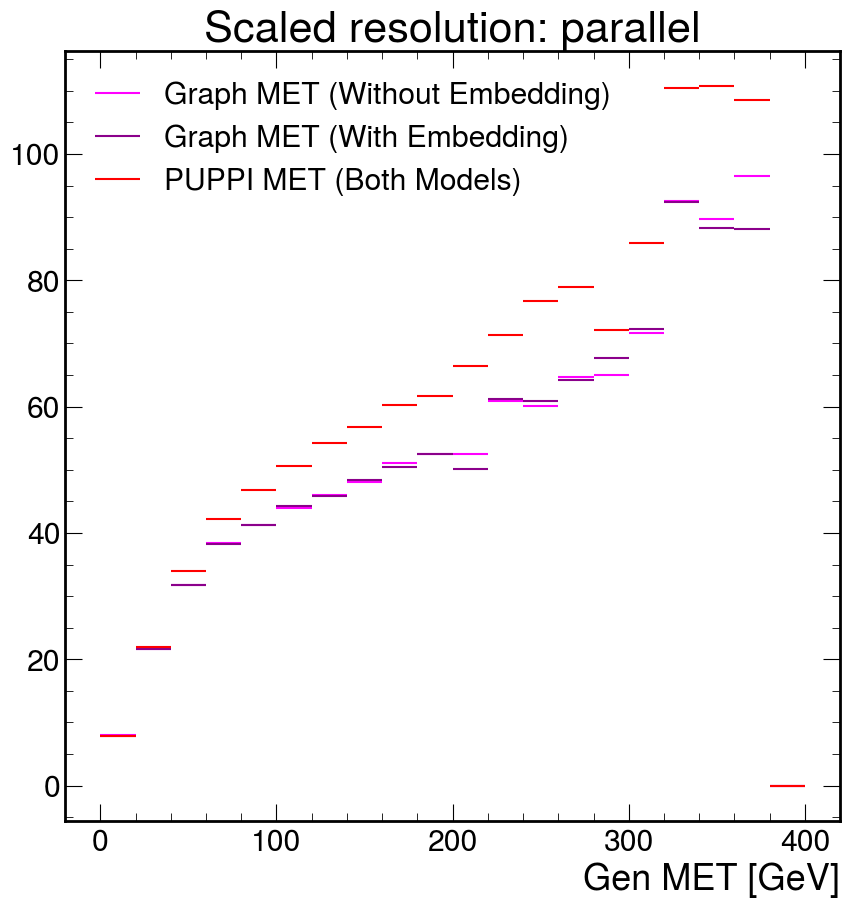

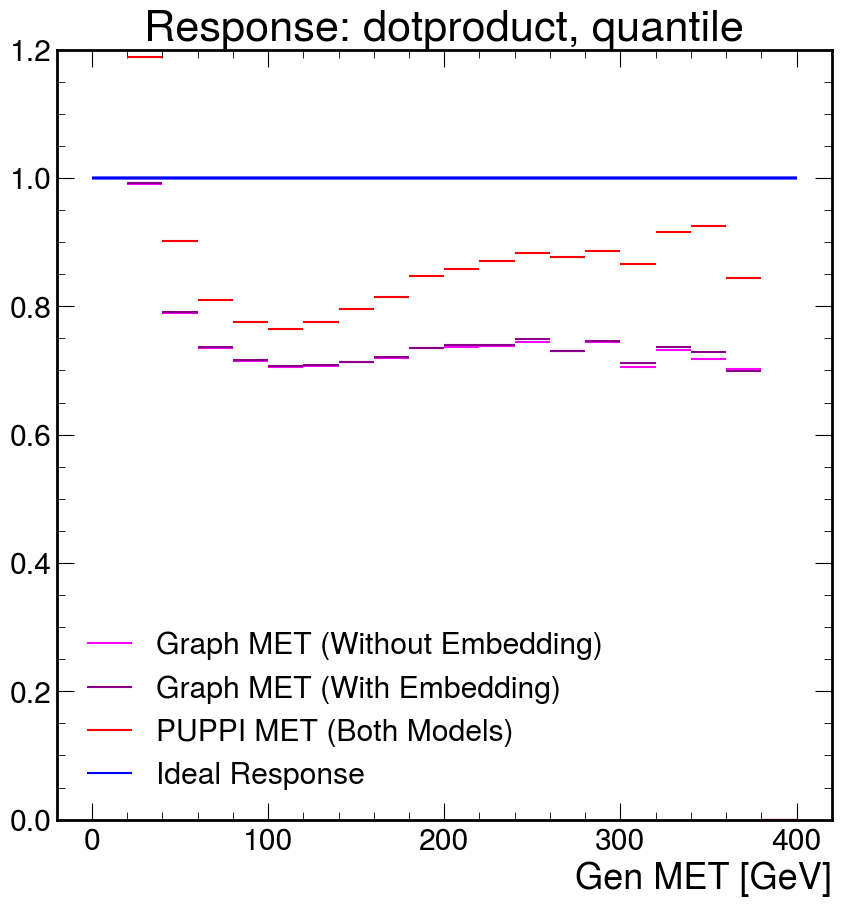

In [44]:
# Use specific labels for each model
model_label_1 = 'Without Embedding'
model_label_2 = 'With Embedding'
colors_model_1 = {
    'MET': 'magenta',
    'puppiMET': 'red',
}
colors_model_2 = {
    'MET': 'darkmagenta',
    'puppiMET': 'red',
}

# Iterate over each key in resolutions_arr to plot for both models
for key in resolutions_arr:
    if key == 'MET':  # Plot only for MET
        # Plot for model_1 (without embedding)
        plot_metric(model_1, key, 'u_perp_scaled_resolution', 1, model_label_1, colors_model_1[key], 'Gen MET [GeV]', 'Scaled resolution: perpendicular')
        plot_metric(model_1, key, 'u_par_scaled_resolution', 2, model_label_1, colors_model_1[key], 'Gen MET [GeV]', 'Scaled resolution: parallel')
        plot_metric(model_1, key, 'R', 3, model_label_1, colors_model_1[key], 'Gen MET [GeV]', 'Response: dotproduct, quantile', ylim=[0, 1.2])

        # Plot for model_2 (with embedding)
        plot_metric(model_2, key, 'u_perp_scaled_resolution', 1, model_label_2, colors_model_2[key], 'Gen MET [GeV]', 'Scaled resolution: perpendicular')
        plot_metric(model_2, key, 'u_par_scaled_resolution', 2, model_label_2, colors_model_2[key], 'Gen MET [GeV]', 'Scaled resolution: parallel')
        plot_metric(model_2, key, 'R', 3, model_label_2, colors_model_2[key], 'Gen MET [GeV]', 'Response: dotproduct, quantile', ylim=[0, 1.2])
    else:  # For puppiMET, plot only once since it's the same for both models
        plot_metric(model_1, key, 'u_perp_scaled_resolution', 1, 'Both Models', colors_model_1[key], 'Gen MET [GeV]', 'Scaled resolution: perpendicular')
        plot_metric(model_1, key, 'u_par_scaled_resolution', 2, 'Both Models', colors_model_1[key], 'Gen MET [GeV]', 'Scaled resolution: parallel')
        plot_metric(model_1, key, 'R', 3, 'Both Models', colors_model_1[key], 'Gen MET [GeV]', 'Response: dotproduct, quantile', ylim=[0, 1.2])

# Add a line to represent the ideal response on the response plot
plt.figure(3)
plt.hlines(np.ones(20), 0, 400, color='b', label='Ideal Response')
plt.legend(loc='lower left')
